# Tackle Noise Error Correction 
------------
- Tackling noise with error correction is a crucial concept in quantum computing to ensure the reliability and accuracy of quantum computations. Here's a brief description:
- In a quantum computer, quantum bits (qubits) are susceptible to errors due to external factors like temperature
fluctuations or electromagnetic interference. These errors can disrupt the delicate quantum states required for
computation. Error correction involves using additional qubits and quantum operations to detect and rectify
errors, maintaining the integrity of quantum information.
- Quantum error correction codes encode the logical qubits across multiple physical qubits in a way that allows
errors to be detected and corrected without directly measuring the quantum state. This is achieved through
carefully designed quantum gates that manipulate the qubits and enable error detection. If an error is detected,
the information can be recovered through quantum operations, ensuring the correct outcome of the
computation.
- Error correction techniques, such as the surface code or the stabilizer codes, help extend the lifespan of
quantum information and enable quantum computers to perform complex computations with high accuracy.
- However, error correction comes at the cost of requiring additional qubits and more intricate quantum
operations, which poses a challenge in terms of hardware and computational resources.
- A brief description of how error correction helps tackle noise in quantum computing, presented in bullet points:

1.**Error Vulnerability:** Quantum computers use delicate quantum states (qubits) that are sensitive to external
factors, leading to errors in computations.

2.**Quantum Error Correction:** Error correction is a technique to mitigate errors by encoding qubits across multiple
physical qubits in a way that allows errors to be detected and corrected.

3.**Error Detection:** Quantum error correction codes involve measuring specific properties of the encoded qubits
without directly measuring the fragile quantum state.

-------

## Tackling noise with error correction in quantum computing offers several key advantages that are pivotal for the
reliable and practical implementation of quantum technologies. 
Here are its advantages:
- **Enhanced Reliability:** Error correction enables quantum computations to remain accurate and reliable even in
the presence of noisy and error-prone quantum hardware.
- **Extended Qubit Lifespan:** By actively identifying and correcting errors, error correction helps maintain the
coherence and stability of quantum states, prolonging the effective lifespan of qubits.
- **Higher-Quality Results:** The use of error correction ensures that the outcomes of quantum computations are
closer to the desired results, minimizing the impact of errors on the final output.

Steps
1. Identify the noisy channel.
2. Choose an error correction technique.
3. Implement error detection and correction.
4. Integrate into your system.
5. Test and optimize.
7. Monitor and maintain.

-------

In [6]:
from qiskit import transpile, QuantumCircuit
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, ReadoutError
from qiskit.visualization import plot_histogram

In [7]:
# Define the quantum circuit
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# Transpile the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

In [8]:
# Defining and applying noise model
noise_model = NoiseModel()
readout_error = ReadoutError([[0.9, 0.1], [0.1, 0.9]])
for qubit in range(3):
    noise_model.add_readout_error(readout_error, [qubit])

# Run the noisy simulation
job = backend.run(transpiled_qc, shots=1000, noise_model=noise_model)
result = job.result()
counts = result.get_counts()

In [9]:
# Function to apply a correction matrix to counts (simplified)
def apply_correction(counts, correction_matrix):
    # Get the sorted list of keys
    sorted_keys = sorted(counts.keys())

    # Initializing corrected counts dictionary
    corrected_counts = {key: 0 for key in sorted_keys}

    # Calculate corrected counts using basic Python operations
    for i, key in enumerate(sorted_keys):
        for j, corrected_key in enumerate(sorted_keys):
            if correction_matrix[i][j] != 0:
                corrected_counts[corrected_key] += counts.get(key, 0) * correction_matrix[i][j]

    return corrected_counts

Original Counts: {'111': 363, '011': 51, '001': 40, '100': 61, '110': 45, '101': 45, '010': 42, '000': 353}
Mitigated Counts: {'000': 353, '001': 40, '010': 42, '011': 51, '100': 61, '101': 45, '110': 45, '111': 363}


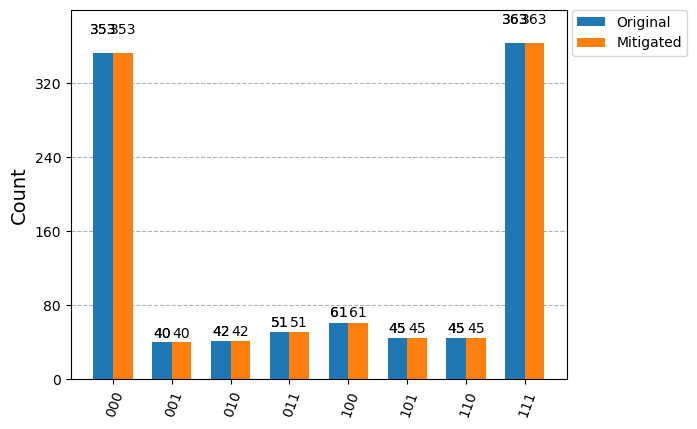

In [10]:
# Example correction matrix (identity matrix for simplicity)
correction_matrix = [[1 if i == j else 0 for j in range(len(counts.keys()))] for i in range(len(counts.keys()))]

# Apply correction matrix
mitigated_counts = apply_correction(counts, correction_matrix)

# Print the original counts
print(f"Original Counts: {counts}")

# Print the mitigated counts
print(f"Mitigated Counts: {mitigated_counts}")

# Plot the histograms of the original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])